In [1]:
import os
import pickle

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.chdir('../')
from utils.config_dataset import *

import warnings
warnings.filterwarnings("ignore")

# limit CPU cores used by the script

os.environ["OMP_NUM_THREADS"] = "32" # export OMP_NUM_THREADS=1
os.environ["OPENBLAS_NUM_THREADS"] = "32" # export OPENBLAS_NUM_THREADS=1
os.environ["MKL_NUM_THREADS"] = "32" # export MKL_NUM_THREADS=1
os.environ["VECLIB_MAXIMUM_THREADS"] = "32" # export VECLIB_MAXIMUM_THREADS=1
os.environ["NUMEXPR_NUM_THREADS"] = "32" # export NUMEXPR_NUM_THREADS=1

In [2]:
path_endpoints = 'hirid_benchmark/endpoints'
df_endpoints = pd.read_parquet(path_endpoints)

In [3]:
df_endpoints

,datetime,rel_datetime,patientid,resp_failure_status,resp_failure_status_relabel,fio2_available,fio2_suppox,fio2_ambient,fio2_estimated,pao2_estimated,pao2_available,estimated_ratio,vent_state,circ_failure_status
0,2183-05-12 12:35:00,0.0,148,event_1,True,0.0,0.0,1.0,0.21,45.017586,0.0,214.369457,0.0,0.0
1,2183-05-12 12:40:00,300.0,148,event_1,True,0.0,0.0,1.0,0.21,43.275052,0.0,206.071675,0.0,0.0
2,2183-05-12 12:45:00,600.0,148,event_1,True,0.0,0.0,1.0,0.21,41.934237,0.0,199.686844,0.0,0.0
3,2183-05-12 12:50:00,900.0,148,event_1,True,0.0,0.0,1.0,0.21,40.985761,0.0,195.170290,0.0,0.0
4,2183-05-12 12:55:00,1200.0,148,event_1,True,0.0,0.0,1.0,0.21,40.390709,0.0,192.336711,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2130-07-23 13:26:00,151800.0,33671,UNKNOWN,False,0.0,1.0,0.0,0.34,106.397342,0.0,312.933360,0.0,0.0
507,2130-07-23 13:31:00,152100.0,33671,UNKNOWN,False,0.0,1.0,0.0,0.34,100.709785,0.0,296.205250,0.0,0.0
508,2130-07-23 13:36:00,152400.0,33671,UNKNOWN,False,0.0,1.0,0.0,0.34,95.693419,0.0,281.451232,0.0,0.0
509,2130-07-23 13:41:00,152700.0,33671,UNKNOWN,False,0.0,1.0,0.0,0.34,91.292979,0.0,268.508762,0.0,0.0


In [7]:
df_resp_fail = df_endpoints[df_endpoints['resp_failure_status_relabel']==True]
resp_fail_num = df_resp_fail.shape[0]
resp_fail_num

2260512

In [9]:
resp_fail_freq = {}
for pid in tqdm(df_resp_fail['patientid'].unique()):
    resp_fail_freq[pid] = df_resp_fail[df_resp_fail['patientid']==pid].shape[0]

df_resp_fail['patientid'].unique().shape[0]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 29306/29306 [01:16<00:00, 383.10it/s]


29306

In [11]:
resp_fail_count = [item[1] for item in resp_fail_freq.items()]
for p in [10, 25, 50, 75, 90]:
    print(f"Percentile {p}: {np.percentile(resp_fail_count, p)}")

Percentile 10: 12.0
Percentile 25: 13.0
Percentile 50: 42.0
Percentile 75: 81.0
Percentile 90: 175.0


(0.0, 600.0)

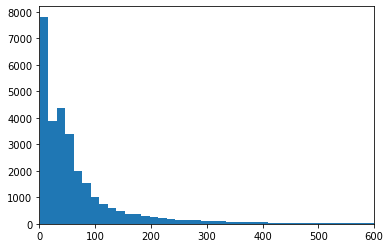

In [14]:
plt.hist(resp_fail_count, bins=100)
plt.xlim(0, 600)

In [17]:
df_circ_fail = df_endpoints[df_endpoints['circ_failure_status']==True]
circ_fail_num = df_circ_fail.shape[0]
circ_fail_num

1467758

In [18]:
circ_fail_freq = {}
for pid in tqdm(df_circ_fail['patientid'].unique()):
    circ_fail_freq[pid] = df_circ_fail[df_circ_fail['patientid']==pid].shape[0]

df_circ_fail['patientid'].unique().shape[0]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 8596/8596 [00:13<00:00, 647.43it/s]


8596

Percentile 10: 14.0
Percentile 25: 32.0
Percentile 50: 80.0
Percentile 75: 177.0
Percentile 90: 376.0


(0.0, 600.0)

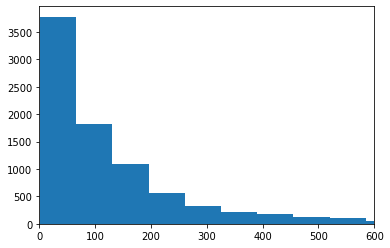

In [20]:
circ_fail_count = [item[1] for item in circ_fail_freq.items()]
for p in [10, 25, 50, 75, 90]:
    print(f"Percentile {p}: {np.percentile(circ_fail_count, p)}")
    
plt.hist(circ_fail_count, bins=100);
plt.xlim(0, 600)

In [21]:
df_circ_fail[df_circ_fail['patientid']==pid]

,datetime,rel_datetime,patientid,resp_failure_status,resp_failure_status_relabel,fio2_available,fio2_suppox,fio2_ambient,fio2_estimated,pao2_estimated,pao2_available,estimated_ratio,vent_state,circ_failure_status
138,2166-11-05 19:08:17.840,41400.0,29309,event_2,True,1.0,0.0,0.0,0.500,103.613846,1.0,207.227691,1.0,1.0
139,2166-11-05 19:13:17.840,41700.0,29309,event_2,True,1.0,0.0,0.0,0.500,103.222204,1.0,206.444407,1.0,1.0
140,2166-11-05 19:18:17.840,42000.0,29309,event_2,True,1.0,0.0,0.0,0.502,102.695414,1.0,204.572535,1.0,1.0
141,2166-11-05 19:23:17.840,42300.0,29309,event_2,True,1.0,0.0,0.0,0.503,101.961454,1.0,202.706672,1.0,1.0
142,2166-11-05 19:28:17.840,42600.0,29309,event_2,True,1.0,0.0,0.0,0.500,100.932042,1.0,201.864084,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2166-11-06 11:48:17.840,101400.0,29309,event_2,False,1.0,0.0,0.0,0.500,81.612914,0.0,163.225829,1.0,1.0
339,2166-11-06 11:53:17.840,101700.0,29309,event_2,False,1.0,0.0,0.0,0.507,81.444425,0.0,160.639889,1.0,1.0
340,2166-11-06 11:58:17.840,102000.0,29309,event_2,False,1.0,0.0,0.0,0.504,81.281933,0.0,161.273672,1.0,1.0
341,2166-11-06 12:03:17.840,102300.0,29309,event_2,False,1.0,0.0,0.0,0.501,81.153587,0.0,161.983213,1.0,1.0


In [22]:
df_resp_fail[df_resp_fail['patientid']==pid]

,datetime,rel_datetime,patientid,resp_failure_status,resp_failure_status_relabel,fio2_available,fio2_suppox,fio2_ambient,fio2_estimated,pao2_estimated,pao2_available,estimated_ratio,vent_state,circ_failure_status
33,2166-11-05 10:23:17.840,9900.0,29309,event_2,True,1.0,0.0,0.0,1.00,87.829055,0.0,87.829055,1.0,0.0
34,2166-11-05 10:28:17.840,10200.0,29309,event_2,True,1.0,0.0,0.0,1.00,87.956528,0.0,87.956528,1.0,0.0
35,2166-11-05 10:33:17.840,10500.0,29309,event_2,True,1.0,0.0,0.0,1.00,87.956860,1.0,87.956860,1.0,0.0
36,2166-11-05 10:38:17.840,10800.0,29309,event_2,True,1.0,0.0,0.0,1.00,87.831113,1.0,87.831113,1.0,0.0
37,2166-11-05 10:43:17.840,11100.0,29309,event_2,True,1.0,0.0,0.0,1.00,87.626801,1.0,87.626801,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2166-11-08 15:13:17.840,286500.0,29309,event_2,True,0.0,1.0,0.0,0.54,75.770847,0.0,140.316383,0.0,0.0
956,2166-11-08 15:18:17.840,286800.0,29309,event_2,True,0.0,1.0,0.0,0.54,75.725087,0.0,140.231642,0.0,0.0
957,2166-11-08 15:23:17.840,287100.0,29309,event_2,True,0.0,1.0,0.0,0.54,75.698739,0.0,140.182851,0.0,0.0
958,2166-11-08 15:28:17.840,287400.0,29309,event_2,True,0.0,1.0,0.0,0.54,75.684130,0.0,140.155797,0.0,0.0
